# DBSCAN

# 1. Setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
np.random.seed(42)

In [5]:
iris   = load_iris()
X      = iris.data[:, 2:4]  #Use petal length and petal width for clustering
y_true = iris.target

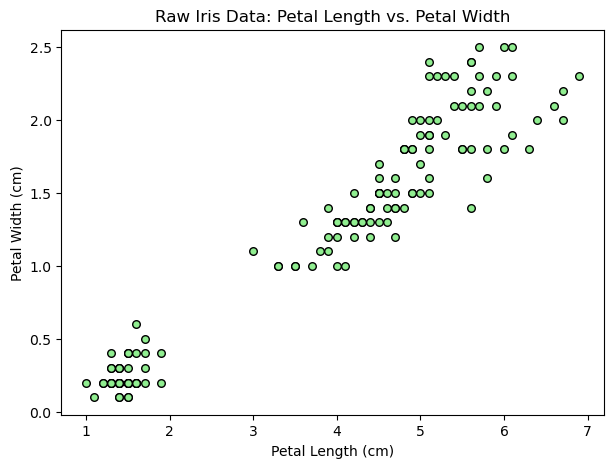

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c = 'lightgreen', edgecolor = 'k', s = 30)
plt.title("Raw Iris Data: Petal Length vs. Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

# 2. K-distance Graph $\to \text{eps}$

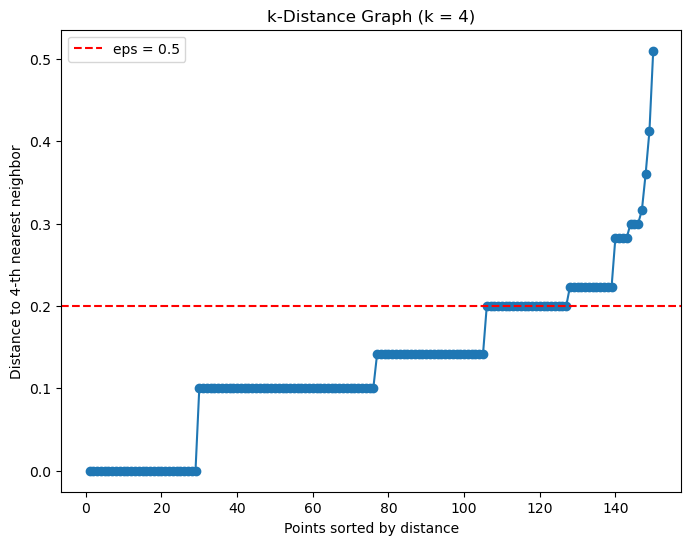

In [12]:
from sklearn.neighbors import NearestNeighbors

#DBSCAN's parameters
min_samples = 5      # minPts
k = min_samples - 1  # k-distance, k = 4

#Compute the distances to the k-th nearest neighbor for each point
nbrs = NearestNeighbors(n_neighbors = k).fit(X)
distances, indices = nbrs.kneighbors(X)

#Extract the k-th nearest neighbor distances and sort them in ascending order
kth_distances = np.sort(distances[:, k-1])

#Plot the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(kth_distances) + 1), kth_distances, marker = 'o', linestyle='-')
plt.title(f"k-Distance Graph (k = {k})")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}-th nearest neighbor")

# Vandidate eps value (elbow point) for DBSCAN
plt.axhline(y = 0.2, color='r', linestyle='--', label="eps = 0.5")
plt.legend()
plt.show()

# 3. DBSCAN

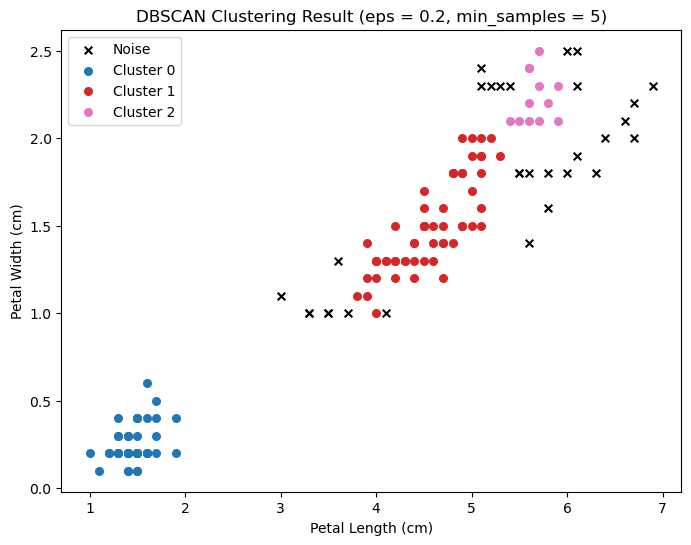

In [14]:
from sklearn.cluster import DBSCAN

eps_value = 0.2
min_samples_value = min_samples

#DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric='euclidean')
labels = dbscan.fit_predict(X)

#Plotting
plt.figure(figsize=(8, 6))
unique_labels = np.unique(labels)
colors = plt.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    class_mask = (labels == label)
    if label == -1:
        #Noise
        plt.scatter(X[class_mask, 0], X[class_mask, 1], c = 'k', marker = 'x', s = 30, label = "Noise")
    else:
        plt.scatter(X[class_mask, 0], X[class_mask, 1], color = colors(label), s = 30, label = f"Cluster {label}")
        
plt.title(f"DBSCAN Clustering Result (eps = {eps_value}, min_samples = {min_samples_value})")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

****